In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
from pycoral.adapters.common import input_size
from pycoral.adapters.detect import get_objects
from pycoral.utils.dataset import read_label_file

In [3]:
def append_objs_to_img(cv2_im, inference_size, objs, labels):
    height, width, channels = cv2_im.shape
    scale_x, scale_y = width / inference_size[0], height / inference_size[1]
    for obj in objs:
        bbox = obj.bbox.scale(scale_x, scale_y)
        x0, y0 = int(bbox.xmin), int(bbox.ymin)
        x1, y1 = int(bbox.xmax), int(bbox.ymax)

        percent = int(100 * obj.score)
        print(labels.get(obj.id, obj.id))
        label = '{}% {}'.format(percent, labels.get(obj.id, obj.id))

        cv2_im = cv2.rectangle(cv2_im, (x0, y0), (x1, y1), (0, 255, 0), 2)
        cv2_im = cv2.putText(cv2_im, label, (x0, y0+30),
                             cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)
    return cv2_im


In [4]:
interpreter = tf.lite.Interpreter(model_path="./ssd_mobilenet_v2_cpu.tflite")
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [6]:
labels = read_label_file("coco_labels.txt")
inference_size = input_size(interpreter)
print(f"Labels : {labels}")
print(f"Interface Size : {inference_size}")

Labels : {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'n/a', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'n/a', 26: 'backpack', 27: 'umbrella', 28: 'n/a', 29: 'n/a', 30: 'handbag', 31: 'tie', 32: 'suitcase', 33: 'frisbee', 34: 'skis', 35: 'snowboard', 36: 'sports ball', 37: 'kite', 38: 'baseball bat', 39: 'baseball glove', 40: 'skateboard', 41: 'surfboard', 42: 'tennis racket', 43: 'bottle', 44: 'n/a', 45: 'wine glass', 46: 'cup', 47: 'fork', 48: 'knife', 49: 'spoon', 50: 'bowl', 51: 'banana', 52: 'apple', 53: 'sandwich', 54: 'orange', 55: 'broccoli', 56: 'carrot', 57: 'hot dog', 58: 'pizza', 59: 'donut', 60: 'cake', 61: 'chair', 62: 'couch', 63: 'potted plant', 64: 'bed', 65: 'n/a', 66: 'dining table', 67: 'n/a', 68: 'n/a', 69: 'toilet',

person
sports ball
person


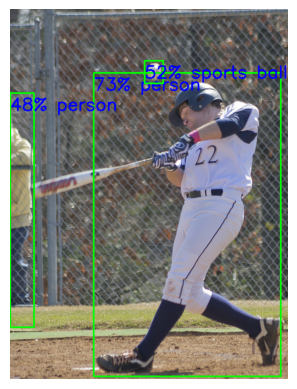

In [10]:
image = cv2.imread('images/000000000016.jpg')
height, width = input_details[0]['shape'][1], input_details[0]['shape'][2]
input_image = cv2.resize(image, (width, height))
input_image = np.expand_dims(input_image, axis=0)

interpreter.set_tensor(input_details[0]['index'], input_image.astype(np.uint8))
interpreter.invoke()

objs = get_objects(interpreter, 0.1)[:3]
cv2_im = append_objs_to_img(image, inference_size, objs, labels)

cv2_im_rgb = cv2.cvtColor(cv2_im, cv2.COLOR_BGR2RGB)

plt.imshow(cv2_im_rgb)
plt.axis('off')  
plt.show()